In [64]:
# SETUP
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Set output size of images
width = 20
height = 10 
matplotlib.rcParams['figure.figsize'] = [width, height]

# https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
# Kommentar, gammal kod behös SIFT_create istället för SIFT och drawMathcesKnn behöver specifiera output image (None)
# Explanation algorithm https://stackoverflow.com/questions/51197091/how-does-the-lowes-ratio-test-work
# Feature matching function
def match(img1, img2, ratio):
    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # BFMatcher with default params (BF = Brute Force)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)

    # Apply ratio test
    matches_good = []
    for m,n in matches:
        if m.distance < ratio*n.distance:
            matches_good.append([m])

    # cv2.drawMatchesKnn expects list of lists as matches.
    img_result = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches_good,None,flags=2)
    
    return img_result

In [66]:
# READ IMAGES
alonso_0 = cv2.imread("images/Alonso_0.jpg")
alonso_1 = cv2.imread("images/Alonso_1.jpg")
alonso_2 = cv2.imread("images/Alonso_2.jpg")
alonso_3 = cv2.imread("images/Alonso_3.jpg")

arco_1 = cv2.imread("images/arco1.png")
arco_2 = cv2.imread("images/arco2.png")

imagen_prueba_0 = cv2.imread("images/ImagenPrueba0.png")[:,:,::-1]
imagen_prueba_borroneada = cv2.imread("images/ImagenPruebaBorroneada.png")[:,:,::-1]
imagen_prueba_rotada = cv2.imread("images/ImagenPruebaRotada.png")[:,:,::-1]

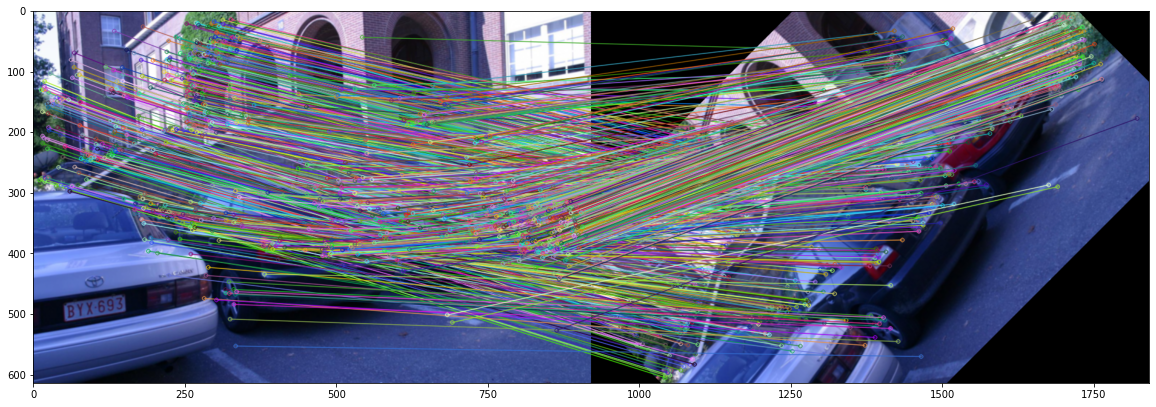

In [74]:
# RUN TESTS
img1 = imagen_prueba_0
img2 = imagen_prueba_rotada

ratio = 0.2

img_result = match(img1, img2, ratio)
plt.imshow(img_result)
# plt.savefig('images_output/imagen_prueba_0_rotada_02.png', bbox_inches='tight')
plt.show()

# Unnecessary functions

In [6]:
from scipy import ndimage
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img


def scale(img, scale_percent=0.5):
    width = int(img.shape[1] * scale_percent)
    height = int(img.shape[0] * scale_percent)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

* El patente de SIFT que requeria licencia para usos comerciales se expiró en marzo 2020
* https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/